In [1]:
# allows to import own functions
import sys
import os

path_name = os.getcwd()
root_project = os.path.split(path_name)[0]
sys.path.append(root_project)

import networkx as nx
from ast import literal_eval
from sklearn import preprocessing
import plotly.express as px
from src.utils.help_func import extract_indicator, last_values
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



sns.set()

In [2]:
df = pd.read_pickle('../data/interim/country_info_nonans.gpickle')
df

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,destinations
0,Afghanistan,AFG,37172386.0,6.614466e+06,5.096638e+06,33.0000,65.0000,0.004484,0.003510,0.177940,0.137108,Asia,AS,"[IND, PAK, ARE, IRN, TUR, AZE, KWT, TJK]"
1,Albania,ALB,2866376.0,5.340000e+06,5.415000e+06,41.0000,20.0000,0.003620,0.003729,1.862980,1.889145,Europe,EU,"[GRC, ITA, GBR, DEU, SVN, AUT, TUR]"
2,Algeria,DZA,42228429.0,2.657000e+06,5.610000e+06,28.0000,3.0000,0.001801,0.003863,0.062920,0.132849,Africa,AF,"[DEU, FRA, TUR, CIV, ESP, JOR, LBN, MLI, BEL, ..."
3,American Samoa,ASM,64948.0,2.020000e+04,1.066593e+06,-14.3333,-170.0000,0.000014,0.000735,0.311018,16.422263,Oceania,OC,[USA]
5,Angola,AGO,30809762.0,2.180000e+05,3.000000e+03,-12.5000,18.5000,0.000148,0.000002,0.007076,0.000097,Africa,AF,"[COD, FRA, MAR, GBR, COG, ZAF, ARE, BRA, CUB, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Vietnam,VNM,95540395.0,1.549800e+07,1.793038e+07,16.0000,106.0000,0.010505,0.012348,0.162214,0.187673,Asia,AS,"[SGP, CHN, PHL, JPN, FRA, KHM, MYS, DEU, HKG, ..."
213,Virgin Islands (U.S.),VIR,106977.0,3.810000e+05,4.049390e+05,18.3333,-64.8333,0.000258,0.000279,3.561513,3.785290,North America,NaN,"[VGB, PRI, USA, DMA, KNA]"
215,"Yemen, Rep.",YEM,28498687.0,3.667000e+05,3.838138e+05,15.0000,48.0000,0.000249,0.000264,0.012867,0.013468,Asia,AS,"[ARE, SAU, SOM, DJI, BHR, JOR, IND, EGY, QAT, ..."
216,Zambia,ZMB,17351822.0,1.072000e+06,1.059313e+06,-15.0000,30.0000,0.000727,0.000729,0.061780,0.061049,Africa,AF,"[NLD, ZWE, MWI, KEN, ZAF, BWA, AGO, ARE, ETH, ..."


In [3]:
df.isna().sum()

country_name              0
country_code              0
total_pop                 0
arrivals                  0
departures                0
latitude                  0
longitude                 0
arrivals/total            0
departures/total          0
arrivals/population       0
departures/population     0
continent_name            0
continent_code           31
destinations              0
dtype: int64

De los siguientes paisees no tengo posibles destinos...

In [4]:
df.loc[df['destinations'].isna()]

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,destinations


In [5]:
df_move = df.loc[:, ['country_name', 'country_code']]

In [6]:
df_move['arrivals/day'] = df['arrivals'] / 365
df_move['departures/day'] = df['departures'] / 365
df_move

,country_name,country_code,arrivals/day,departures/day
0,Afghanistan,AFG,18121.824771,13963.392578
1,Albania,ALB,14630.136986,14835.616438
2,Algeria,DZA,7279.452055,15369.863014
3,American Samoa,ASM,55.342466,2922.172952
5,Angola,AGO,597.260274,8.219178
...,...,...,...,...
212,Vietnam,VNM,42460.273973,49124.339198
213,Virgin Islands (U.S.),VIR,1043.835616,1109.421885
215,"Yemen, Rep.",YEM,1004.657534,1051.544651
216,Zambia,ZMB,2936.986301,2902.228282


In [7]:
df_move.sort_values(by='arrivals/day', ascending=False)

,country_name,country_code,arrivals/day,departures/day
69,France,FRA,244717.808219,73736.986301
180,Spain,ESP,226775.342466,52372.602740
207,United States,USA,218481.972603,253600.000000
42,China,CHN,172328.767123,410191.780822
98,Italy,ITA,168677.260274,91361.917808
...,...,...,...,...
124,Mali,MLI,38.356164,734.357931
200,Turkmenistan,TKM,22.465753,104.109589
105,Kiribati,KIR,19.452055,2565.485295
126,Marshall Islands,MHL,18.630137,2459.667102


In [8]:
df_move['arrivals/day'].sum()

4041862.221290799

In [9]:
df_move['departures/day'].sum()

3978444.5633435855

In [10]:
df_move['departures/day'].sum() - df_move['arrivals/day'].sum()

-63417.65794721339

In [11]:
df_move.sort_values(by='departures/day', ascending=False)

,country_name,country_code,arrivals/day,departures/day
42,China,CHN,172328.767123,410191.780822
75,Germany,DEU,106523.287671,297375.342466
207,United States,USA,218481.972603,253600.000000
88,"Hong Kong SAR, China",HKG,80172.602740,252641.095890
206,United Kingdom,GBR,99495.890411,192838.356164
...,...,...,...,...
210,Vanuatu,VUT,317.808219,79.452055
145,Niger,NER,430.136986,27.397260
152,Palau,PLW,290.410959,24.657534
5,Angola,AGO,597.260274,8.219178


In [12]:
df_move['prop_arrivals'] = df_move['arrivals/day'] / \
    np.sum(df_move['arrivals/day'])

In [13]:
countrycode_to_proparriv = pd.Series(
    df_move['prop_arrivals'].values, index=df_move['country_code']).to_dict()

In [14]:
countrycode_to_departures = pd.Series(
    df_move['departures/day'].values, index=df_move['country_code']).to_dict()

In [15]:
len(countrycode_to_proparriv), len(df_move)

(205, 205)

<AxesSubplot:>

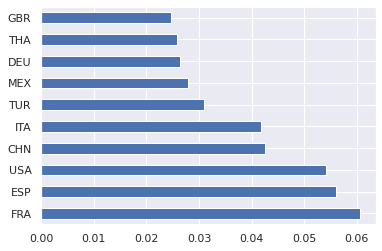

In [16]:
foo = pd.Series(countrycode_to_proparriv).sort_values(ascending = False)
foo[:10].plot(kind='barh')

<AxesSubplot:>

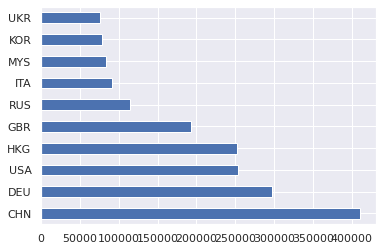

In [17]:
foo = pd.Series(countrycode_to_departures).sort_values(ascending = False)
foo[:10].plot(kind='barh')

In [18]:
sum(countrycode_to_departures.values())

3978444.563343589

In [19]:
countrycode_to_departures

{'AFG': 13963.392577902894,
 'ALB': 14835.616438356165,
 'DZA': 15369.86301369863,
 'ASM': 2922.1729520927706,
 'AGO': 8.219178082191782,
 'ATG': 913.9797718903702,
 'ARG': 30493.15068493151,
 'ARM': 4446.575342465753,
 'ABW': 2594.226468419217,
 'AUS': 31241.095890410958,
 'AUT': 32556.164383561645,
 'AZE': 10736.986301369863,
 'BHS': 3854.194709982751,
 'BHR': 7857.534246575343,
 'BGD': 4000.0,
 'BRB': 1954.4634755267716,
 'BLR': 2290.4109589041095,
 'BEL': 35884.931506849316,
 'BLZ': 1847.9820208188871,
 'BEN': 592.1204218751784,
 'BMU': 526.027397260274,
 'BTN': 4388.089039032863,
 'BOL': 2904.109589041096,
 'BIH': 6126.211313116389,
 'BWA': 3149.717002396534,
 'BRA': 29117.80821917808,
 'VGB': 380.82191780821915,
 'BRN': 4058.452663836746,
 'BGR': 18353.424657534248,
 'BFA': 753.4481471759618,
 'BDI': 95.89041095890411,
 'CPV': 2064.4325584276353,
 'KHM': 5465.753424657534,
 'CMR': 2418.254164665727,
 'CAN': 71323.28767123287,
 'CYM': 2402.515809362989,
 'CAF': 104.10958904109589,

In [20]:
df_move.head()

,country_name,country_code,arrivals/day,departures/day,prop_arrivals
0,Afghanistan,AFG,18121.824771,13963.392578,0.004484
1,Albania,ALB,14630.136986,14835.616438,0.003620
2,Algeria,DZA,7279.452055,15369.863014,0.001801
3,American Samoa,ASM,55.342466,2922.172952,0.000014
5,Angola,AGO,597.260274,8.219178,0.000148


In [21]:
df_move['prop_arrivals'].sum()

1.0

In [22]:
df.head()

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,destinations
0,Afghanistan,AFG,37172386.0,6.614466e+06,5.096638e+06,33.0000,65.0,0.004484,0.003510,0.177940,0.137108,Asia,AS,"[IND, PAK, ARE, IRN, TUR, AZE, KWT, TJK]"
1,Albania,ALB,2866376.0,5.340000e+06,5.415000e+06,41.0000,20.0,0.003620,0.003729,1.862980,1.889145,Europe,EU,"[GRC, ITA, GBR, DEU, SVN, AUT, TUR]"
2,Algeria,DZA,42228429.0,2.657000e+06,5.610000e+06,28.0000,3.0,0.001801,0.003863,0.062920,0.132849,Africa,AF,"[DEU, FRA, TUR, CIV, ESP, JOR, LBN, MLI, BEL, ..."
3,American Samoa,ASM,64948.0,2.020000e+04,1.066593e+06,-14.3333,-170.0,0.000014,0.000735,0.311018,16.422263,Oceania,OC,[USA]
5,Angola,AGO,30809762.0,2.180000e+05,3.000000e+03,-12.5000,18.5,0.000148,0.000002,0.007076,0.000097,Africa,AF,"[COD, FRA, MAR, GBR, COG, ZAF, ARE, BRA, CUB, ..."


Ahora lo que quiero es asignar a cada uno de los destinos de un pais un numero de personas que viajan a ese pais.

In [23]:
df.head()

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,destinations
0,Afghanistan,AFG,37172386.0,6.614466e+06,5.096638e+06,33.0000,65.0,0.004484,0.003510,0.177940,0.137108,Asia,AS,"[IND, PAK, ARE, IRN, TUR, AZE, KWT, TJK]"
1,Albania,ALB,2866376.0,5.340000e+06,5.415000e+06,41.0000,20.0,0.003620,0.003729,1.862980,1.889145,Europe,EU,"[GRC, ITA, GBR, DEU, SVN, AUT, TUR]"
2,Algeria,DZA,42228429.0,2.657000e+06,5.610000e+06,28.0000,3.0,0.001801,0.003863,0.062920,0.132849,Africa,AF,"[DEU, FRA, TUR, CIV, ESP, JOR, LBN, MLI, BEL, ..."
3,American Samoa,ASM,64948.0,2.020000e+04,1.066593e+06,-14.3333,-170.0,0.000014,0.000735,0.311018,16.422263,Oceania,OC,[USA]
5,Angola,AGO,30809762.0,2.180000e+05,3.000000e+03,-12.5000,18.5,0.000148,0.000002,0.007076,0.000097,Africa,AF,"[COD, FRA, MAR, GBR, COG, ZAF, ARE, BRA, CUB, ..."


In [24]:
l_people = []
df_people = df.copy()

for country in df.iterrows():
#     print(country[1]['destinations'])
    country_destinations = country[1]['destinations']
    prob = {x: countrycode_to_proparriv[x] for x in country_destinations}
#     print(d)
    sum_prob = np.sum(list(prob.values()))
    prob = {k: v / sum_prob for k, v in prob.items()}
#     print(prob)
#     print(sum(prob.values()))
#     print(country[0])
#     print(df_people.loc[country[0], 'destinations'])
    people = {k: int(round(v*countrycode_to_departures[country[1]['country_code']], 0)) for k, v in prob.items()}
    l_people.append(people)

In [27]:
df['departures/day'] = l_people
df.head()

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,destinations,departures/day
0,Afghanistan,AFG,37172386.0,6.614466e+06,5.096638e+06,33.0000,65.0,0.004484,0.003510,0.177940,0.137108,Asia,AS,"[IND, PAK, ARE, IRN, TUR, AZE, KWT, TJK]","{'IND': 2319, 'PAK': 129, 'ARE': 2833, 'IRN': ..."
1,Albania,ALB,2866376.0,5.340000e+06,5.415000e+06,41.0000,20.0,0.003620,0.003729,1.862980,1.889145,Europe,EU,"[GRC, ITA, GBR, DEU, SVN, AUT, TUR]","{'GRC': 1803, 'ITA': 3685, 'GBR': 2173, 'DEU':..."
2,Algeria,DZA,42228429.0,2.657000e+06,5.610000e+06,28.0000,3.0,0.001801,0.003863,0.062920,0.132849,Africa,AF,"[DEU, FRA, TUR, CIV, ESP, JOR, LBN, MLI, BEL, ...","{'DEU': 976, 'FRA': 2242, 'TUR': 1149, 'CIV': ..."
3,American Samoa,ASM,64948.0,2.020000e+04,1.066593e+06,-14.3333,-170.0,0.000014,0.000735,0.311018,16.422263,Oceania,OC,[USA],{'USA': 2922}
5,Angola,AGO,30809762.0,2.180000e+05,3.000000e+03,-12.5000,18.5,0.000148,0.000002,0.007076,0.000097,Africa,AF,"[COD, FRA, MAR, GBR, COG, ZAF, ARE, BRA, CUB, ...","{'COD': 0, 'FRA': 2, 'MAR': 0, 'GBR': 1, 'COG'..."


In [28]:
df.loc[df['country_code'] == 'AGO']

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,destinations,departures/day
5,Angola,AGO,30809762.0,218000.0,3000.0,-12.5,18.5,0.000148,0.000002,0.007076,0.000097,Africa,AF,"[COD, FRA, MAR, GBR, COG, ZAF, ARE, BRA, CUB, ...","{'COD': 0, 'FRA': 2, 'MAR': 0, 'GBR': 1, 'COG'..."


In [31]:
df.loc[df['country_code'] == 'AGO', 'departures/day'].values

array([{'COD': 0, 'FRA': 2, 'MAR': 0, 'GBR': 1, 'COG': 0, 'ZAF': 0, 'ARE': 0, 'BRA': 0, 'CUB': 0, 'ZWE': 0, 'PRT': 0, 'CHN': 1, 'STP': 0, 'ETH': 0, 'ESP': 2, 'NLD': 0, 'KEN': 0, 'DEU': 1, 'MOZ': 0}],
      dtype=object)

In [32]:
l = []

for i in range(len(df)):
    l.append(np.sum(list(df.iloc[i, df.columns.get_loc('destinations')].values())))
l

AttributeError: 'list' object has no attribute 'values'

In [38]:
import json
with open('../data/interim/alpha3_to_country.txt', 'r') as file:
    alpha3_to_country = json.load(file)

In [39]:
d = df.loc[df['country_code'] == 'ESP', 'departures/day'].item()
d = {alpha3_to_country[k]: v for k,v in d.items()}
d

{'Switzerland': 543,
 'Gambia': 29,
 'Morocco': 644,
 'Germany': 2037,
 'Latvia': 102,
 'Greece': 1578,
 'United Kingdom': 1902,
 'United States': 4177,
 'Austria': 1614,
 'France': 4679,
 'Denmark': 668,
 'Portugal': 848,
 'Canada': 1107,
 'Algeria': 139,
 'Belgium': 478,
 'Mexico': 2164,
 'Argentina': 364,
 'Colombia': 204,
 'Finland': 169,
 'Italy': 3225,
 'Belarus': 602,
 'Brazil': 347,
 'China': 3295,
 'Cuba': 245,
 'Qatar': 95,
 'Sweden': 390,
 'Norway': 298,
 'Poland': 1028,
 'Dominican Republic': 344,
 'Ireland': 572,
 'United Arab Emirates': 1115,
 'Bulgaria': 486,
 'Netherlands': 984,
 'Slovakia': 118,
 'Lithuania': 148,
 'Hungary': 919,
 'Malta': 136,
 'Estonia': 169,
 'Russia': 1286,
 'Jordan': 217,
 'Croatia': 872,
 'Senegal': 71,
 'Ukraine': 739,
 'Luxembourg': 53,
 'Romania': 614,
 'Czech Republic': 556,
 'Israel': 216,
 'Mauritania': 2,
 'Ghana': 47,
 'Venezuela': 22,
 'Guatemala': 93,
 'Ecuador': 133,
 'Angola': 11,
 'Peru': 231,
 'Nigeria': 276,
 'Panama': 93,
 'Chile

Hago un nuevo grafo para poder hacer la matrix OD, es mas rapido asi:

In [40]:
import networkx as nx

H = nx.DiGraph()

for index, country in df.iterrows():
    destinations = country['departures/day']
    for k, v in destinations.items():
        H.add_edge(country['country_code'], k, people=v)

In [41]:
len(H.nodes)

205

In [42]:
OD_matrix = nx.attr_matrix(H, edge_attr='people', rc_order = df['country_code'] )
OD_matrix

matrix([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0., 128.],
        [  0.,   0.,   0., ...,   0., 498.,   0.]])

In [45]:
df.shape

(205, 15)

In [50]:
i= 80
print(np.sum(OD_matrix[i,:]))
print(df.iloc[i, df.columns.get_loc('departures')] / 365)

631.0
630.531430393028


##### FINAL